In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("azure_demand_dataset.csv")
df.head()


,timestamp,region,service_type,demand_units,capacity_allocated,cost_usd,availability_pct,customer_growth_rate,enterprise_it_spending_index
0,01-01-2023,East US,Compute,1596.0,1879,154.85,98.88,0.0103,0.814
1,01-01-2023,East US,Storage,927.0,1198,134.04,97.68,0.0387,0.890
2,01-01-2023,West Europe,Compute,1022.0,1263,72.30,99.47,0.0159,0.981
3,01-01-2023,West Europe,Storage,732.0,974,61.89,98.52,0.0242,1.076
4,01-01-2023,Central India,Compute,704.0,781,47.68,97.91,0.0404,1.130


In [ ]:
df.shape


(5848, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5848 entries, 0 to 5847
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     5848 non-null   object 
 1   region                        5848 non-null   object 
 2   service_type                  5848 non-null   object 
 3   demand_units                  5673 non-null   float64
 4   capacity_allocated            5848 non-null   int64  
 5   cost_usd                      5673 non-null   float64
 6   availability_pct              5673 non-null   float64
 7   customer_growth_rate          5848 non-null   float64
 8   enterprise_it_spending_index  5848 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 411.3+ KB


In [ ]:
df.describe()


,demand_units,capacity_allocated,cost_usd,availability_pct,customer_growth_rate,enterprise_it_spending_index
count,5673.000000,5848.000000,5673.000000,5673.000000,5848.000000,5848.000000
mean,1247.446854,1422.227428,124.131890,98.515205,0.030204,1.000574
std,433.354270,438.957554,57.175574,0.866508,0.011546,0.115255
min,500.000000,564.000000,26.360000,97.000000,0.010000,0.800000
25%,868.000000,1045.000000,79.740000,97.750000,0.020200,0.901750
50%,1247.000000,1418.500000,113.210000,98.530000,0.030200,1.001000
75%,1621.000000,1804.250000,162.530000,99.270000,0.040300,1.098000
max,1999.000000,2291.000000,296.410000,100.000000,0.050000,1.200000


In [ ]:
df.isnull().sum()


,0
timestamp,0
region,0
service_type,0
demand_units,175
capacity_allocated,0
cost_usd,175
availability_pct,175
customer_growth_rate,0
enterprise_it_spending_index,0


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True)
df = df.sort_values(by='timestamp')



In [ ]:
df['region'].unique()


array(['East Us', 'West Europe', 'Central India', 'Southeast Asia'],
      dtype=object)

In [ ]:
df['region'] = df['region'].str.title()
df['region'].unique()


array(['East Us', 'West Europe', 'Central India', 'Southeast Asia'],
      dtype=object)

In [ ]:
df['region'] = df['region'].replace({
    'East Us': 'East US'
})
df['region'].unique()


array(['East US', 'West Europe', 'Central India', 'Southeast Asia'],
      dtype=object)

In [ ]:
df['service_type'].unique()


array(['Compute', 'Storage', 'storage', 'compute'], dtype=object)

In [ ]:
df['service_type'] = df['service_type'].str.title()
df['service_type'].unique()



array(['Compute', 'Storage'], dtype=object)

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df['demand_units'] = df['demand_units'].interpolate()
df['demand_units'].isnull().sum()


np.int64(0)

In [ ]:
df['cost_usd'] = df['cost_usd'].fillna(
    df['demand_units'] * 0.1
)
df['cost_usd'].isnull().sum()


np.int64(0)

In [ ]:
df['availability_pct'] = df['availability_pct'].fillna(method='ffill')
df['availability_pct'].isnull().sum()



/tmp/ipython-input-506420318.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['availability_pct'] = df['availability_pct'].fillna(method='ffill')


np.int64(0)

In [ ]:
df.isnull().sum()


,0
timestamp,0
region,0
service_type,0
demand_units,0
capacity_allocated,0
cost_usd,0
availability_pct,0
customer_growth_rate,0
enterprise_it_spending_index,0


In [ ]:
df['timestamp'].min(), df['timestamp'].max()


(Timestamp('2023-01-01 00:00:00'), Timestamp('2024-12-31 00:00:00'))

In [ ]:
df['region'].unique()


array(['East US', 'West Europe', 'Central India', 'Southeast Asia'],
      dtype=object)

In [ ]:
df.reset_index(drop=True, inplace=True)


In [ ]:
df['year_month'] = df['timestamp'].dt.to_period('M')


In [ ]:
monthly_avg = df.groupby('year_month')['demand_units'].mean()


In [ ]:
monthly_avg.index = monthly_avg.index.to_timestamp()


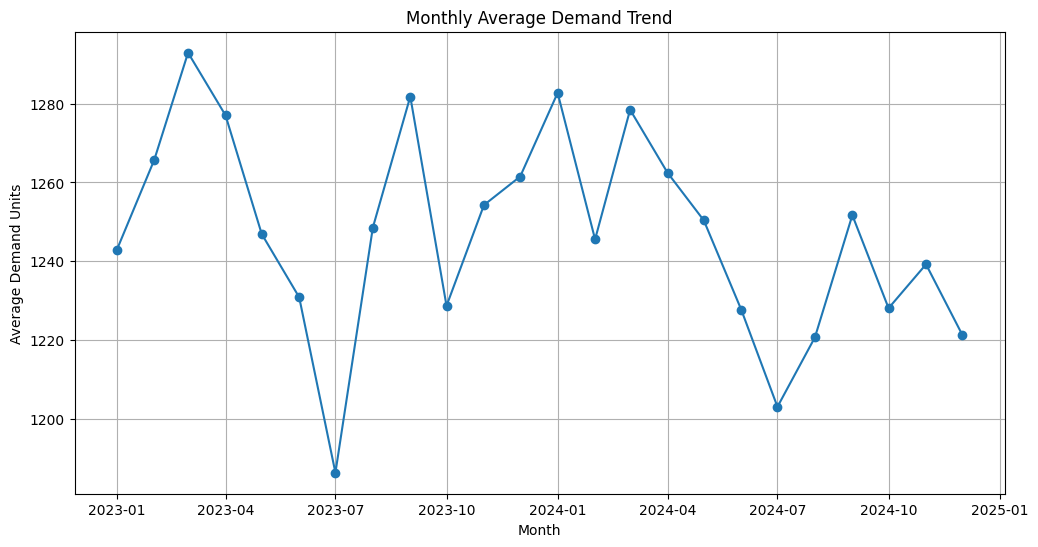

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')

plt.title("Monthly Average Demand Trend")
plt.xlabel("Month")
plt.ylabel("Average Demand Units")
plt.grid(True)

plt.show()


In [ ]:
df['year_month'] = df['timestamp'].dt.to_period('M')
monthly_region = df.groupby(['year_month', 'region'])['demand_units'].mean().reset_index()
monthly_region['year_month'] = monthly_region['year_month'].dt.to_timestamp()



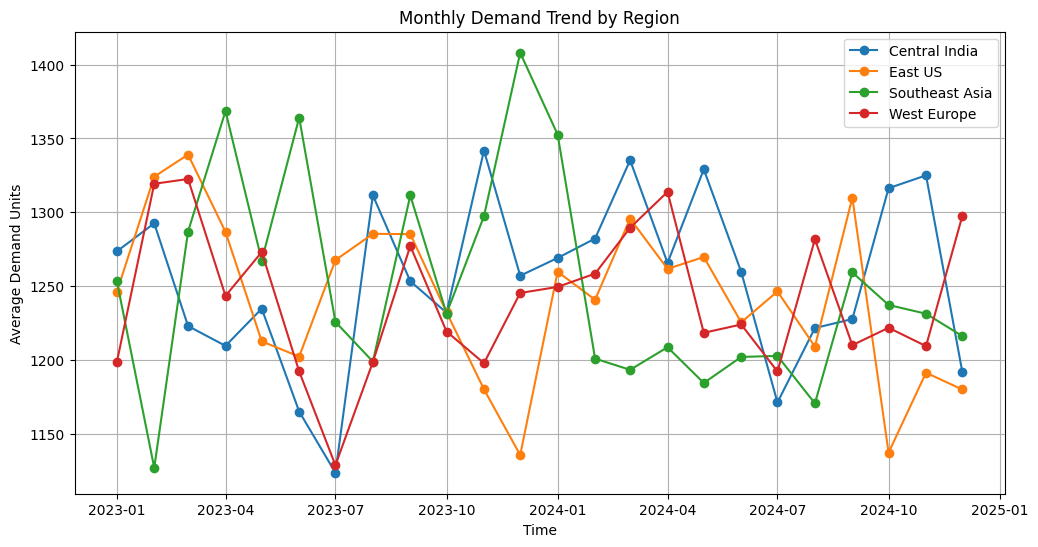

In [ ]:
plt.figure(figsize=(12,6))

for region in monthly_region['region'].unique():
    subset = monthly_region[monthly_region['region'] == region]
    plt.plot(subset['year_month'], subset['demand_units'], marker='o', label=region)

plt.title("Monthly Demand Trend by Region")
plt.xlabel("Time")
plt.ylabel("Average Demand Units")
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
df.to_csv("azure_demand_cleaned_v2.csv", index=False)


In [ ]:
files.download("azure_demand_cleaned_v2.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>